## CONFOUNDERS IDENTIFICATION

In [1]:
# PACKAGE IMPORT
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


At first, we import the cleaned data.

In [2]:
# CLEANED DATA LOADING
data = pd.read_csv("data/allcolumns_80.csv")

In [3]:
data

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


In order to identify confounders, we need to remove the diet variables from the data.

In [4]:
non_diet_var = ['V1',
 'V2',
 'V3',
 'V6',
 'V8',
 'V10',
 'V11',
 'V12',
 'V13',
 'V17',
 'V18',
 'V19',
 'V20',
 'FUM2',
 'FUM3',
 'FUM5',
 'FUM7',
 'FUM8',
 'FUM12',
 'FUM15',
 'ANTR2',
 'ANTR4',
 'ANTR6',
 'ANTR12',
 'PORP4',
 'ALC4',
 'ALC8',
 'ALC12',
 'ALC16',
 'ALC20',
 'ALC25',
 'ANAM1',
 'ANAM2',
 'ANAM3',
 'ANAM4',
 'ANAM5',
 'ANAM6',
 'ANAM7',
 'ANAM8',
 'ANAM9',
 'ANAM11',
 'ANAM12',
 'ANAM13',
 'ANAM14',
 'ANAM15',
 'ANAM16',
 'ANAM17',
 'ANAM18',
 'ANAM19',
 'ANAM20',
 'ANAM21',
 'ANAM22',
 'ANAM24',
 'ANAM25',
 'ANAM26',
 'ANAM27',
 'FAM1',
 'FAM2',
 'FAM9',
 'FAM15',
 'GIN1',
 'GIN2',
 'GIN8',
 'GIN9',
 'GIN12',
 'GIN13',
 'GIN14',
 'GIN15',
 'GIN16',
 'GIN18',
 'GIN26',
 'GIN27',

 'FARM2',
 'FARM4',
 'FARM6',
 'FARM10',
 'FARM12',
 'FARM14',
 'FARM16',
 'FARM17',
 'FARM18',
 'FARM24',
 'CENTRO_1',
 'CENTRO_2',
 'CENTRO_4',
 'CENTRO_5',
 'CENTRO_6',
 'CENTRO_7',
 'V4_1',
 'V5_1',
 'V5_2',
 'V5_3',
 'V5_4',
 'V5_5',
 'V5_6',
 'V5_7',
 'V5_8',
 'V5_9',
 'V5_10',
 'V5_11',
 'V5_12',
 'V5_13',
 'V5_15',
 'V9_1',
 'V9_2',
 'V9_3',
 'V9_4',
 'V9_5',
 'V14_1',
 'V14_2',
 'V14_3',
 'V14_4',
 'V14_5',
 'V14_6',
 'V14_7',
 'V14_8',
 'V14_9',
 'V14_30',
 'V15_1',
 'V15_2',
 'V15_3',
 'V15_4',
 'V15_5',
 'V15_6',
 'V15_7',
 'V15_8',
 'V15_9',
 'FUM10_1',
 'FUM10_2',
 'FUM10_3',
 'FUM13_1',
 'FUM13_2',
 'FUM13_3',
 'FUM13_52',
 'FUM16_1',
 'FUM16_2',
 'FUM16_3',
 'FUM17_1',
 'FUM17_2',
 'FUM17_3',
 'FAM3_1',
 'FAM3_2',
 'FAM3_3',
 'FAM3_4',
 'FAM3_5',
 'FAM3_6',
 'FAM3_7',
 'FAM3_8',
 'FAM3_9',
 'FAM4_1',
 'FAM6_155',
 'FAM6_179',
 'FAM6_185',
 'FAM6_1409',
 'FAM6_1410',
 'FAM6_1419',
 'FAM6_1420',
 'FAM6_1429',
 'FAM6_1449',
 'FAM6_1459',
 'FAM6_1460',
 'FAM6_1469',
 'FAM6_1479',
 'FAM6_1489',
 'FAM6_1490',
 'FAM6_1499',
 'FAM6_1500',
 'FAM6_1509',
 'FAM6_1510',
 'FAM6_1519',
 'FAM6_1520',
 'FAM6_1529',
 'FAM6_1533',
 'FAM6_1538',
 'FAM6_1539',
 'FAM6_1541',
 'FAM6_1543',
 'FAM6_1548',
 'FAM6_1550',
 'FAM6_1552',
 'FAM6_1560',
 'FAM6_1561',
 'FAM6_1562',
 'FAM6_1569',
 'FAM6_1579',
 'FAM6_1589',
 'FAM6_1590',
 'FAM6_1591',
 'FAM6_1599',
 'FAM6_1610',
 'FAM6_1619',
 'FAM6_1620',
 'FAM6_1622',
 'FAM6_1629',
 'FAM6_1639',
 'FAM6_1641',
 'FAM6_1643',
 'FAM6_1649',
 'FAM6_1701',
 'FAM6_1702',
 'FAM6_1704',
 'FAM6_1708',
 'FAM6_1709',
 'FAM6_1710',
 'FAM6_1715',
 'FAM6_1717',
 'FAM6_1719',
 'FAM6_1723',
 'FAM6_1726',
 'FAM6_1727',
 'FAM6_1729',
 'FAM6_1733',
 'FAM6_1739',
 'FAM6_1740',
 'FAM6_1744',
 'FAM6_1749',
 'FAM6_1790',
 'FAM6_1799',
 'FAM6_1809',
 'FAM6_1820',
 'FAM6_1828',
 'FAM6_1830',
 'FAM6_1839',
 'FAM6_1840',
 'FAM6_1844',
 'FAM6_1850',
 'FAM6_1869',
 'FAM6_1877',
 'FAM6_1879',
 'FAM6_1889',
 'FAM6_1890',
 'FAM6_1899',
 'FAM6_1906',
 'FAM6_1909',
 'FAM6_1910',
 'FAM6_1916',
 'FAM6_1919',
 'FAM6_1922',
 'FAM6_1929',
 'FAM6_1930',
 'FAM6_1949',
 'FAM6_1950',
 'FAM6_1951',
 'FAM6_1952',
 'FAM6_1953',
 'FAM6_1954',
 'FAM6_1955',
 'FAM6_1963',
 'FAM6_1969',
 'FAM6_1970',
 'FAM6_1986',
 'FAM6_1990',
 'FAM6_1991',
 'FAM6_1999',
 'FAM6_2000',
 'FAM6_2001',
 'FAM6_2008',
 'FAM6_2019',
 'FAM6_2021',
 'FAM6_2028',
 'FAM6_2029',
 'FAM6_2030',
 'FAM6_2040',
 'FAM6_2049',
 'FAM6_2059',
 'FAM6_2080',
 'FAM6_2089',
 'FAM6_2199',
 'FAM6_2389',
 'FAM6_2392',
 'FAM6_2396',
 'FAM6_2399',
 'FAM8_1',
 'FAM8_2',
 'FAM8_3',
 'FAM8_4',
 'FAM8_5',
 'FAM8_6',
 'FAM8_7',
 'FAM8_8',
 'FAM8_9',
 'FAM11_155',
 'FAM11_179',
 'FAM11_185',
 'FAM11_1409',
 'FAM11_1419',
 'FAM11_1459',
 'FAM11_1490',
 'FAM11_1499',
 'FAM11_1509',
 'FAM11_1511',
 'FAM11_1519',
 'FAM11_1529',
 'FAM11_1533',
 'FAM11_1539',
 'FAM11_1541',
 'FAM11_1550',
 'FAM11_1552',
 'FAM11_1560',
 'FAM11_1561',
 'FAM11_1579',
 'FAM11_1590',
 'FAM11_1599',
 'FAM11_1600',
 'FAM11_1610',
 'FAM11_1618',
 'FAM11_1619',
 'FAM11_1629',
 'FAM11_1649',
 'FAM11_1650',
 'FAM11_1691',
 'FAM11_1709',
 'FAM11_1719',
 'FAM11_1729',
 'FAM11_1730',
 'FAM11_1735',
 'FAM11_1736',
 'FAM11_1739',
 'FAM11_1749',
 'FAM11_1790',
 'FAM11_1799',
 'FAM11_1809',
 'FAM11_1820',
 'FAM11_1828',
 'FAM11_1830',
 'FAM11_1840',
 'FAM11_1844',
 'FAM11_1850',
 'FAM11_1860',
 'FAM11_1869',
 'FAM11_1889',
 'FAM11_1890',
 'FAM11_1899',
 'FAM11_1910',
 'FAM11_1919',
 'FAM11_1929',
 'FAM11_1930',
 'FAM11_1950',
 'FAM11_1954',
 'FAM11_1986',
 'FAM11_1990',
 'FAM11_1991',
 'FAM11_1999',
 'FAM11_2001',
 'FAM11_2008',
 'FAM11_2019',
 'FAM11_2020',
 'FAM11_2021',
 'FAM11_2028',
 'FAM11_2029',
 'FAM11_2049',
 'FAM11_2080',
 'FAM11_2089',
 'FAM13_1',
 'FAM13_2',
 'FAM13_3',
 'FAM13_4',
 'FAM13_5',
 'FAM13_6',
 'FAM13_8',
 'FAM13_9',
 'FAM14_1',
 'FAM14_2',
 'FAM16_155',
 'FAM16_1459',
 'FAM16_1469',
 'FAM16_1490',
 'FAM16_1499',
 'FAM16_1509',
 'FAM16_1515',
 'FAM16_1519',
 'FAM16_1539',
 'FAM16_1541',
 'FAM16_1550',
 'FAM16_1552',
 'FAM16_1579',
 'FAM16_1590',
 'FAM16_1591',
 'FAM16_1599',
 'FAM16_1619',
 'FAM16_1622',
 'FAM16_1629',
 'FAM16_1649',
 'FAM16_1701',
 'FAM16_1709',
 'FAM16_1729',
 'FAM16_1739',
 'FAM16_1749',
 'FAM16_1790',
 'FAM16_1809',
 'FAM16_1820',
 'FAM16_1830',
 'FAM16_1850',
 'FAM16_1889',
 'FAM16_1890',
 'FAM16_1899',
 'FAM16_1910',
 'FAM16_1919',
 'FAM16_1951',
 'FAM16_1990',
 'FAM16_1991',
 'FAM16_2019',
 'FAM16_2029',
 'FAM16_2080',
 'FAM16_2089',
 'FAM18_1',
 'FAM18_2',
 'FAM18_3',
 'FAM18_4',
 'FAM18_6',
 'FAM18_9',
 'FAM19_1',
 'FAM21_1469',
 'FAM21_1499',
 'FAM21_1509',
 'FAM21_1519',
 'FAM21_1552',
 'FAM21_1590',
 'FAM21_1610',
 'FAM21_1619',
 'FAM21_1629',
 'FAM21_1709',
 'FAM21_1749',
 'FAM21_1790',
 'FAM21_1850',
 'FAM21_1889',
 'FAM21_1890',
 'FAM21_1910',
 'FAM21_1919',
 'FAM21_2029',
 'FAM21_2089',
 'FAM23_0',
 'FAM23_3',
 'FAM23_5',
 'FAM23_6',
 'FAM26_1519',
 'FAM26_1729',
 'FAM26_1749',
 'FAM26_1991',
 'FAM28_5',
 'GIN3_1',
 'GIN3_2',
 'GIN3_3',
 'GIN3_4',
 'GIN3_5',
 'GIN3_6',
 'GIN3_8',
 'GIN4_1',
 'GIN4_2',
 'GIN4_3',
 'GIN6_1',
 'GIN6_2',
 'GIN6_3',
 'GIN6_4',
 'GIN11_1',
 'GIN11_2',
 'GIN11_3',
 'GIN11_4',
 'GIN19_0',
 'GIN19_1',
 'GIN19_2',
 'GIN19_3',
 'GIN19_4',
 'GIN19_5',
 'GIN19_6',
 'GIN19_7',
 'GIN19_8',
 'GIN20_0',
 'GIN20_1',
 'GIN20_2',
 'GIN20_3',
 'GIN20_4',
 'GIN20_5',
 'GIN20_6',
 'GIN20_7',
 'GIN20_8',
 'GIN21_0',
 'GIN21_1',
 'GIN21_2',
 'GIN21_3',
 'GIN21_4',
 'GIN21_5',
 'GIN21_6',
 'GIN21_7',
 'GIN21_8',
 'GIN22_0',
 'GIN22_1',
 'GIN22_2',
 'GIN22_3',
 'GIN22_4',
 'GIN22_5',
 'GIN22_6',
 'GIN22_7',
 'GIN22_8',
 'GIN23_0',
 'GIN23_1',
 'GIN23_2',
 'GIN23_3',
 'GIN23_4',
 'GIN23_5',
 'GIN23_6',
 'GIN23_8',
 'GIN24_0',
 'GIN24_1',
 'GIN24_2',
 'GIN24_3',
 'GIN24_4',
 'GIN24_5',
 'GIN24_6',
 'GIN24_8',
 'GIN25_0',
 'GIN25_1',
 'GIN25_2',
 'GIN25_3',
 'GIN25_4',
 'GIN25_6',
 'GIN25_8',
 'GIN28_1',
 'GIN28_2',
 'GIN28_3',
 'GIN28_4',
 'GIN28_8',
 'FARM3_1',
 'FARM3_2',
 'FARM3_3',
 'FARM3_4',
 'FARM3_5',
 'FARM3_6',
 'FARM3_7',
 'FARM3_8',
 'FARM3_9',
 'FARM7_0',
 'FARM7_1',
 'FARM7_2',
 'FARM7_3',
 'FARM7_4',
 'FARM7_5',
 'FARM7_6',
 'FARM7_7',
 'FARM7_8',
 'FARM11_1',
 'FARM11_2',
 'FARM11_3',
 'FARM11_4',
 'FARM11_5',
 'FARM11_6',
 'FARM11_7',
 'FARM11_8',
 'FARM15_0',
 'FARM15_1',
 'FARM15_2',
 'FARM15_3',
 'FARM15_5',
 'FARM15_8',
 'FARM19_1',
 'FARM19_3',
 'FARM19_5',
 'FARM19_8',
 'FARM23_2',
 'FARM23_5',
 'V23_1',
 'V23_2',
 'V23_3',
 'V23_4',
 'ALC_TOTAL',
 'FUM_TYPE1_YEARS',
 'PRE_BMI',
 'WHR',
 'AVG_USUAL_WEIGHT']

In [9]:
# REMOVING DIET VARIABLES
diet_vars = [
    # Fats
    'COND1_1', 'COND1_2', 'COND1_3', 'COND1_4', 'COND1_5', 'COND1_6', 'COND1_7',
    'COND2_1', 'COND2_2', 'COND2_3', 'COND2_5', 'COND2_6', 'COND2_8',
    'COND3_1', 'COND3_2', 'COND3_3', 'COND3_4', 'COND3_5', 'COND3_6', 'COND3_7', 'COND3_8',
    'COND4_1', 'COND4_2', 'COND4_3', 'COND4_4', 'COND4_5', 'COND4_6', 'COND4_7', 'COND4_8',
    'COND5_1', 'COND5_2', 'COND5_3', 'COND5_4', 'COND5_5', 'COND5_6', 'COND5_7', 'COND5_8',
    'COND6_1', 'COND6_2', 'COND6_3', 'COND6_4', 'COND6_5', 'COND6_6', 'COND6_7', 'COND6_8',
    'COND7_1', 'COND7_2', 'COND7_3', 'COND7_4', 'COND7_5', 'COND7_6', 'COND7_7', 'COND7_8',
    'COND8_1', 'COND8_2', 'COND8_3', 'COND8_4', 'COND8_5', 'COND8_6', 'COND8_7', 'COND8_8',
    'COND9_1', 'COND9_2', 'COND9_3', 'COND9_4', 'COND9_5', 'COND9_6', 'COND9_7', 'COND9_8',
    'COND10_1', 'COND10_2', 'COND10_3', 'COND10_4', 'COND10_5', 'COND10_6', 'COND10_7', 'COND10_8',
    'COND11_2', 'COND11_3',
    'COND12_2', 'COND12_3',
    'COND13_2', 'COND13_3',
    'COND14_1', 'COND14_3',
    'COND15_2',
    'COND16_1', 'COND16_2', 'COND16_3',
    'COND17_2', 'COND17_3',

    # Transversal Alimentary Habits
    'PASTI1', 'PASTI2',

    # Milk
    'ALI1', 'ALI2', 'ALI3', 'ALI4', 'ALI5',

    # Meat, eggs, salumi
    'ALI26', 'ALI27', 'ALI28', 'ALI29', 'ALI30', 'ALI31', 'ALI32', 'ALI33',
    'ALI34', 'ALI35', 'ALI36', 'ALI37', 'ALI38',

    # Fish
    'ALI39', 'ALI40', 'ALI41',

    # Vegetables
    'ALI45', 'ALI46', 'ALI47', 'ALI48', 'ALI49', 'ALI50', 'ALI51',
    'ALI54', 'ALI55', 'ALI56', 'ALI57',

    # Fruits
    'ALI58', 'ALI59', 'ALI60', 'ALI61', 'ALI62', 'ALI63', 'ALI64', 'ALI65',
    'ALI66', 'ALI67', 'ALI68', 'ALI69',

    # Sweets and Beverages
    'ALI70', 'ALI71', 'ALI72', 'ALI73', 'ALI74', 'ALI75', 'ALI76', 'ALI77', 'ALI78'
]


#cleaned_vars_raw = """V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,V18,V19,V20,FUM2,FUM3,FUM5,FUM7,FUM8,FUM12,FUM15,ANTR2,ANTR4,ANTR6,ANTR12,PORP4,ALC4,ALC8,ALC12,ALC16,ALC20,ALC25,ANAM1,ANAM2,ANAM3,ANAM4,ANAM5,ANAM6,ANAM7,ANAM8,ANAM9,ICDAN10,ANAM11,ANAM12,ANAM13,ANAM14,ANAM15,ANAM16,ANAM17,ANAM18,ANAM19,ANAM20,ANAM21,ANAM22,ANAM23,ANAM24,ANAM25,ANAM26,ANAM27,FAM1,FAM2,FAM9,FAM10,FAM15,FAM22,FAM30,GIN1,GIN2,GIN8,GIN9,GIN10,GIN13,GIN14,GIN15,GIN18,GIN26,GIN27,FARM1,FARM2,FARM4,FARM6,FARM8,FARM10,FARM12,FARM14,FARM17,FARM18,FARM24,NUT13,NUT21,NUT26,NUT28,NUT29,NUT31,NUT36,NUT42,NUT43,NUT45,NUT47,NUT48,NUT49,NUT52,CENTRO_1,CENTRO_2,CENTRO_3,CENTRO_4,CENTRO_5,CENTRO_6,CENTRO_7,V4_1,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10,V5_11,V5_12,V5_13,V5_15,V9_1,V9_2,V9_3,V9_4,V9_5,V14_1,V14_2,V14_3,V14_4,V14_5,V14_6,V14_7,V14_8,V14_9,V14_30,V15_1,V15_2,V15_3,V15_4,V15_5,V15_6,V15_7,V15_8,V15_9,FUM10_1,FUM10_2,FUM10_3,FUM13_1,FUM13_2,FUM13_3,FUM13_7,FUM13_52,FUM16_1,FUM16_2,FUM16_3,FUM17_1,FUM17_2,FUM17_3,FAM3_0,FAM3_1,FAM3_2,FAM3_3,FAM3_4,FAM3_5,FAM3_6,FAM3_7,FAM3_8,FAM3_9,FAM4_1,FAM6_155,FAM6_179,FAM6_185,FAM6_1409,FAM6_1410,FAM6_1419,FAM6_1420,FAM6_1429,FAM6_1449,FAM6_1459,FAM6_1460,FAM6_1469,FAM6_1479,FAM6_1489,FAM6_1490,FAM6_1499,FAM6_1500,FAM6_1509,FAM6_1510,FAM6_1519,FAM6_1520,FAM6_1529,FAM6_1533,FAM6_1538,FAM6_1539,FAM6_1541,FAM6_1543,FAM6_1548,FAM6_1550,FAM6_1552,FAM6_1560,FAM6_1561,FAM6_1562,FAM6_1569,FAM6_1579,FAM6_1589,FAM6_1590,FAM6_1591,FAM6_1599,FAM6_1610,FAM6_1619,FAM6_1620,FAM6_1622,FAM6_1629,FAM6_1639,FAM6_1641,FAM6_1643,FAM6_1649,FAM6_1701,FAM6_1702,FAM6_1704,FAM6_1708,FAM6_1709,FAM6_1710,FAM6_1715,FAM6_1717,FAM6_1719,FAM6_1723,FAM6_1726,FAM6_1727,FAM6_1729,FAM6_1733,FAM6_1739,FAM6_1740,FAM6_1744,FAM6_1749,FAM6_1790,FAM6_1799,FAM6_1809,FAM6_1820,FAM6_1828,FAM6_1830,FAM6_1839,FAM6_1840,FAM6_1844,FAM6_1850,FAM6_1869,FAM6_1877,FAM6_1879,FAM6_1889,FAM6_1890,FAM6_1899,FAM6_1906,FAM6_1909,FAM6_1910,FAM6_1916,FAM6_1919,FAM6_1922,FAM6_1929,FAM6_1930,FAM6_1949,FAM6_1950,FAM6_1951,FAM6_1952,FAM6_1953,FAM6_1954,FAM6_1955,FAM6_1963,FAM6_1969,FAM6_1970,FAM6_1986,FAM6_1990,FAM6_1991,FAM6_1999,FAM6_2000,FAM6_2001,FAM6_2008,FAM6_2019,FAM6_2021,FAM6_2028,FAM6_2029,FAM6_2030,FAM6_2040,FAM6_2049,FAM6_2059,FAM6_2080,FAM6_2089,FAM6_2199,FAM6_2389,FAM6_2392,FAM6_2396,FAM6_2399,FAM8_1,FAM8_2,FAM8_3,FAM8_4,FAM8_5,FAM8_6,FAM8_7,FAM8_8,FAM8_9,FAM11_155,FAM11_179,FAM11_185,FAM11_1409,FAM11_1419,FAM11_1459,FAM11_1490,FAM11_1499,FAM11_1509,FAM11_1511,FAM11_1519,FAM11_1529,FAM11_1533,FAM11_1539,FAM11_1541,FAM11_1550,FAM11_1552,FAM11_1560,FAM11_1561,FAM11_1579,FAM11_1590,FAM11_1599,FAM11_1600,FAM11_1610,FAM11_1618,FAM11_1619,FAM11_1629,FAM11_1649,FAM11_1650,FAM11_1691,FAM11_1709,FAM11_1719,FAM11_1729,FAM11_1730,FAM11_1735,FAM11_1736,FAM11_1739,FAM11_1749,FAM11_1790,FAM11_1799,FAM11_1809,FAM11_1820,FAM11_1828,FAM11_1830,FAM11_1840,FAM11_1844,FAM11_1850,FAM11_1860,FAM11_1869,FAM11_1889,FAM11_1890,FAM11_1899,FAM11_1910,FAM11_1919,FAM11_1929,FAM11_1930,FAM11_1950,FAM11_1954,FAM11_1986,FAM11_1990,FAM11_1991,FAM11_1999,FAM11_2001,FAM11_2008,FAM11_2019,FAM11_2020,FAM11_2021,FAM11_2028,FAM11_2029,FAM11_2049,FAM11_2080,FAM11_2089,FAM13_1,FAM13_2,FAM13_3,FAM13_4,FAM13_5,FAM13_6,FAM13_8,FAM13_9,FAM14_1,FAM16_155,FAM16_1459,FAM16_1469,FAM16_1490,FAM16_1499,FAM16_1509,FAM16_1515,FAM16_1519,FAM16_1539,FAM16_1541,FAM16_1550,FAM16_1552,FAM16_1579,FAM16_1590,FAM16_1591,FAM16_1599,FAM16_1619,FAM16_1622,FAM16_1629,FAM16_1649,FAM16_1701,FAM16_1709,FAM16_1729,FAM16_1739,FAM16_1749,FAM16_1790,FAM16_1809,FAM16_1820,FAM16_1830,FAM16_1850,FAM16_1889,FAM16_1890,FAM16_1899,FAM16_1910,FAM16_1919,FAM16_1951,FAM16_1990,FAM16_1991,FAM16_2019,FAM16_2029,FAM16_2080,FAM16_2089,FAM18_1,FAM18_2,FAM18_3,FAM18_4,FAM18_6,FAM18_9,FAM19_1,FAM21_1469,FAM21_1499,FAM21_1509,FAM21_1519,FAM21_1552,FAM21_1590,FAM21_1610,FAM21_1619,FAM21_1629,FAM21_1709,FAM21_1749,FAM21_1790,FAM21_1850,FAM21_1889,FAM21_1890,FAM21_1910,FAM21_1919,FAM21_2029,FAM21_2089,FAM23_0,FAM23_3,FAM23_5,FAM23_6,FAM26_1519,FAM26_1729,FAM26_1749,FAM26_1991,FAM28_5,GIN3_1,GIN3_2,GIN3_3,GIN3_4,GIN3_5,GIN3_6,GIN3_8,GIN4_1,GIN4_2,GIN6_1,GIN6_3,GIN6_4,GIN11_1,GIN11_2,GIN11_3,GIN11_4,GIN19_0,GIN19_1,GIN19_2,GIN19_3,GIN19_4,GIN19_5,GIN19_6,GIN19_7,GIN19_8,GIN20_0,GIN20_1,GIN20_2,GIN20_3,GIN20_4,GIN20_5,GIN20_6,GIN20_7,GIN20_8,GIN21_1,GIN21_2,GIN21_3,GIN21_4,GIN21_5,GIN21_6,GIN21_7,GIN21_8,GIN22_1,GIN22_2,GIN22_3,GIN22_4,GIN22_5,GIN22_6,GIN22_7,GIN22_8,GIN23_0,GIN23_1,GIN23_2,GIN23_3,GIN23_4,GIN23_5,GIN23_6,GIN23_8,GIN24_0,GIN24_1,GIN24_2,GIN24_3,GIN24_4,GIN24_5,GIN24_6,GIN24_8,GIN25_1,GIN25_2,GIN25_3,GIN25_4,GIN25_6,GIN25_8,GIN28_1,GIN28_2,GIN28_3,GIN28_4,GIN28_8,FARM3_1,FARM3_2,FARM3_3,FARM3_4,FARM3_5,FARM3_6,FARM3_7,FARM3_8,FARM3_9,FARM7_0,FARM7_1,FARM7_2,FARM7_3,FARM7_4,FARM7_5,FARM7_6,FARM7_7,FARM7_8,FARM11_1,FARM11_2,FARM11_3,FARM11_4,FARM11_5,FARM11_6,FARM11_7,FARM11_8,FARM15_0,FARM15_1,FARM15_2,FARM15_3,FARM15_5,FARM15_8,FARM19_1,FARM19_3,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,PRE_BMI,WHR,AVG_USUAL_WEIGHT"""

In [7]:
cleaned_vars = list(data.columns)
diet_expanded = set()

for var in diet_vars:
    diet_expanded.add(var)
    diet_expanded.update({v for v in cleaned_vars if v.startswith(var + "_")})

# List of all diet variables based on cleaned data
adjusted_diet_vars = sorted(list(diet_expanded))
adjusted_diet_vars = [col.upper() for col in adjusted_diet_vars]

### Selection of Non-Diet Variables

This is the list of all diet variables in the data:

We now remove all diet-related variables from the dataset.

In [10]:
# CREATE A DATAFRAME WITH ALL VARIABLES EXCEPT DIET-RELATED
existing_cols = [col for col in non_diet_var if col in data.columns]
non_diet_data = data.drop(columns=diet_vars).copy()
non_diet_data


,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


### Dealing with Missing Values

We checked for missing values in the data and decided how to handle them.

This preprocessing step is implemented now because we want to adapt data usage to the LASSO model.

In [11]:
null_counts = non_diet_data.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)
columns_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
columns_with_nulls

FAM9      4467
FARM4      932
WHR        568
ANTR4      565
ALI25      232
          ... 
ANAM12       1
ANAM14       1
ANAM18       1
ANAM27       1
ANAM7        1
Length: 100, dtype: int64


We decided to drop the variable `FAM9` and `FARM4` because they have too many missing values.

The others will be imputed using the median.

In [12]:
non_diet_data.drop(columns=['FAM9', 'FARM4'])

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


### Model Training

Then, we used the `sklearn` library to implement a pipeline for the LASSO model. The process takes place in the following steps:

- **Imputation**: The missing values are imputed using the median.
- **Scaling**: The features are scaled using StandardScaler.
- **LASSO**: The LASSO model is trained using the scaled and imputed data.

The model is trained using 5-fold cross-validation and the accuracy is used as the evaluation metric.

In [13]:
# X = all non-diet variables
X = non_diet_data.drop(columns=['V2'])

# y = dependent variable (1 = case, 0 = control)
y = non_diet_data['V2']

# Pipeline: imputation + scaling + LASSO (wit 5-fold CV)
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        cv=5,
        max_iter=5000,
        scoring='accuracy',
        refit=True
    ))
])

# Fit
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1',
                                      scoring='accuracy', solver='saga'))])

### Analysis of Results

In [14]:
# Array of coefficients
lasso_model = pipeline.named_steps['lasso']
coefficients = lasso_model.coef_.ravel()

In [15]:
# Associate columns names with coefficients values
lasso_results = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value
lasso_results['AbsCoeff'] = lasso_results['Coefficient'].abs()
lasso_results_sorted = lasso_results.sort_values(by='AbsCoeff', ascending=False)
lasso_results_sorted

,Variable,Coefficient,AbsCoeff
215,V5_10,1.913546,1.913546
209,V5_4,-1.704021,1.704021
217,V5_12,-1.454384,1.454384
212,V5_7,-1.258364,1.258364
218,V5_13,1.099447,1.099447
...,...,...,...
345,PORZ30_3,0.000000,0.000000
346,PORZ31_1,0.000000,0.000000
347,PORZ31_2,0.000000,0.000000
348,PORZ31_3,0.000000,0.000000


In [22]:
# List of confounders to keep for the analysis
selected_confounders = lasso_results[lasso_results['AbsCoeff'] >= 0.04]
selected_confounders

,Variable,Coefficient,AbsCoeff
3,V8,0.060606,0.060606
5,V11,-0.085474,0.085474
6,V12,0.083514,0.083514
7,V13,0.081859,0.081859
8,V17,-0.057846,0.057846
...,...,...,...
764,GIN6_1,0.043109,0.043109
780,GIN19_8,-0.093178,0.093178
867,V23_1,0.084737,0.084737
870,V23_4,-0.041212,0.041212


In [24]:
selected_confounders.describe()

,Coefficient,AbsCoeff
count,65.000000,65.000000
mean,-0.024237,0.232505
std,0.462286,0.399251
min,-1.704021,0.040985
25%,-0.084020,0.054247
50%,-0.047963,0.082137
75%,0.068310,0.112892
max,1.913546,1.913546


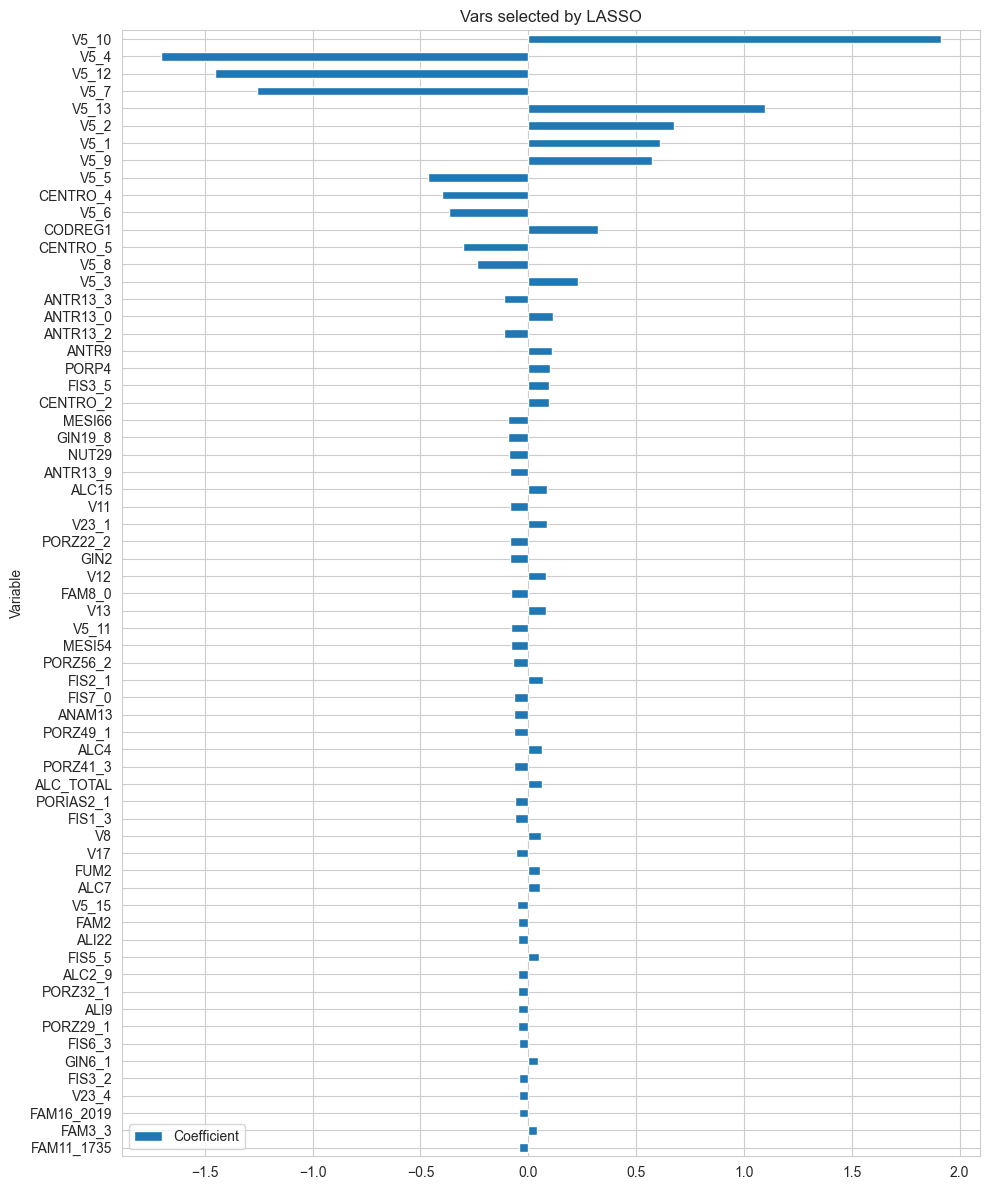

In [23]:
selected_confounders.sort_values('AbsCoeff', ascending=True).plot(
    x='Variable', y='Coefficient', kind='barh', figsize=(10, 12))
plt.title("Vars selected by LASSO")
plt.tight_layout()
plt.show()


## IDENTIFY DIET AS OVERALL EXPOSURE

### Variables Included in the Analysis

The following variables were selected to globally represent each participant's dietary pattern, taking into account weekly consumption habits, types of foods, and cooking practices.

#### Type of Fats and General Eating Habits
- `cond1–cond10`: Type of fat used for dressing salads, cooking vegetables and meat, and seasoning pasta or rice.
- `cond11–cond17`: Self-reported fat consumption, habits related to trimming fat from meats, salt addition, garlic use, and plate-leaving behaviors.
- `pasti1–pasti2`: Number of main meals and snacks per day.

#### Milk and Dairy Products
- `ali1–ali5`: Weekly intake of milk (whole, skimmed), yogurt, cappuccino.

#### Meat, Processed Meats, and Eggs
- `ali26–ali38`: Weekly intake of eggs, poultry, red meat, and processed meats (e.g., ham, salami).

#### Fish
- `ali39–ali41`: Weekly intake of fish (boiled, fried, or canned).

#### Legumes and Vegetables
- `ali45–ali51`, `ali54–ali57`: Weekly intake of legumes and a variety of cooked and raw vegetables.

#### Fruit
- `ali58–ali69`: Weekly intake of fresh, seasonal, or canned fruit, along with fruit juices and jams.

#### Sweets and Sugary Beverages
- `ali70–ali78`: Weekly intake of biscuits, pastries, chocolate, candies, ice cream, and soft drinks.

---

All variables were chosen for their ability to reflect substantial differences in dietary behavior. Each variable will be recoded into categorical or ordinal variables (e.g., low/medium/high) to be suitable for the LCA modeling framework.
